<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_09/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# cargar datos
df = pd.read_csv("data/BC.csv", sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




1. Realice un análisis exploratorio del conjunto de datos.

In [ ]:
#analisis exploratorio de los datos
df.info()       #se ve el nombre de las columnas de este datafram y el tipo de valores que hay en ellas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()         #se determina el numero de valores nulos por columna

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Se logra ver que este dataframe posee 32 columnas, las cuales contienen valores de tipo entero o flotante. Ademas, no hay datos nulos en estas columnas

In [ ]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Gracias a la tabla anterior, se puede ver una descripcion de los datos estadisticos de las columnas de este df. Ahora veamos la distribucion de los datos de cada una de estas columnas. Para ello, se haran graficos de barras con las columnas con datos enteros e histogramas con las columnas con datos flotantes, sin consideraer la columna id pues solo es unmero d eidentificacion d elos pacientes y no aporta informacion sobre la presencia de cancer en un paciente.

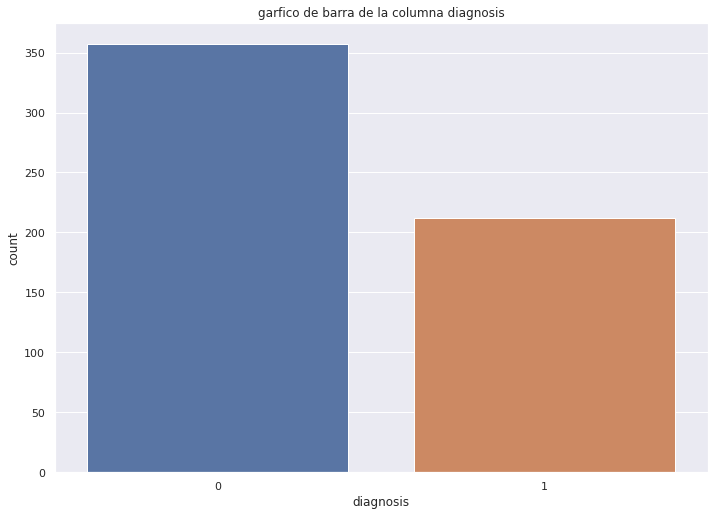

In [ ]:
#distribucion de la columna diagnosis
grupo_diagnosis= df.groupby('diagnosis').apply(lambda x: len(x)).reset_index()
grupo_diagnosis.columns= ['diagnosis', 'count']
sns.barplot(x= 'diagnosis', y= 'count', data= grupo_diagnosis)
plt.title('garfico de barra de la columna diagnosis')
plt.show()

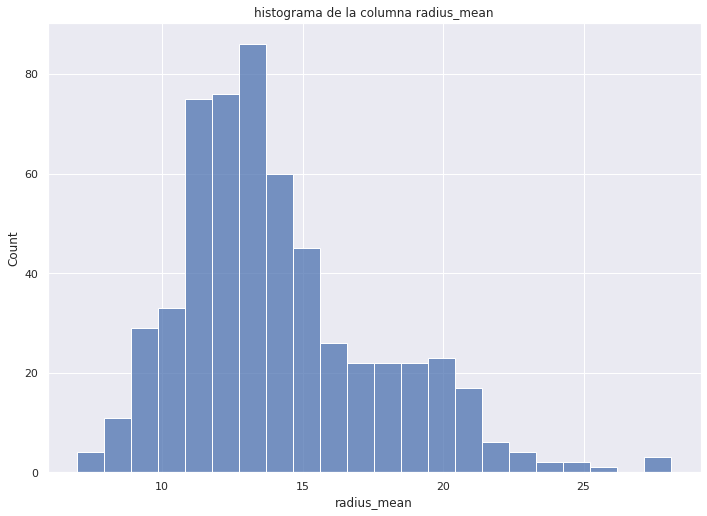

In [ ]:
#distribucion de la columna radius_mean
sns.histplot(df.radius_mean)
plt.title("histograma de la columna radius_mean")
plt.show()

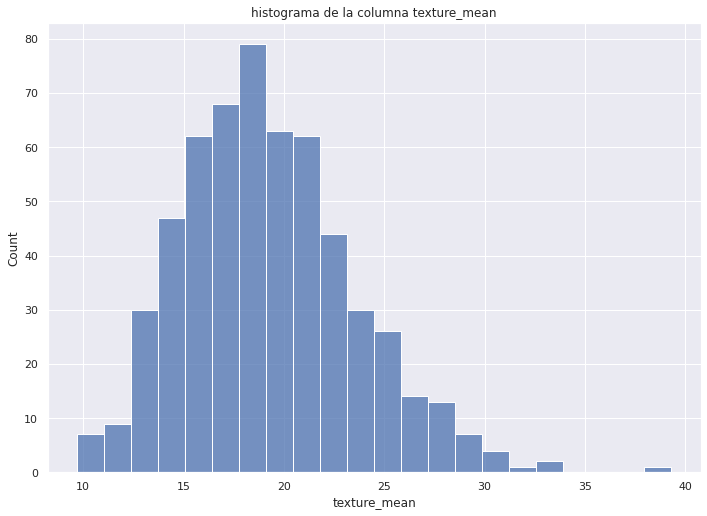

In [ ]:
#distribucion de la columna texture_mean
sns.histplot(df.texture_mean)
plt.title("histograma de la columna texture_mean")
plt.show()

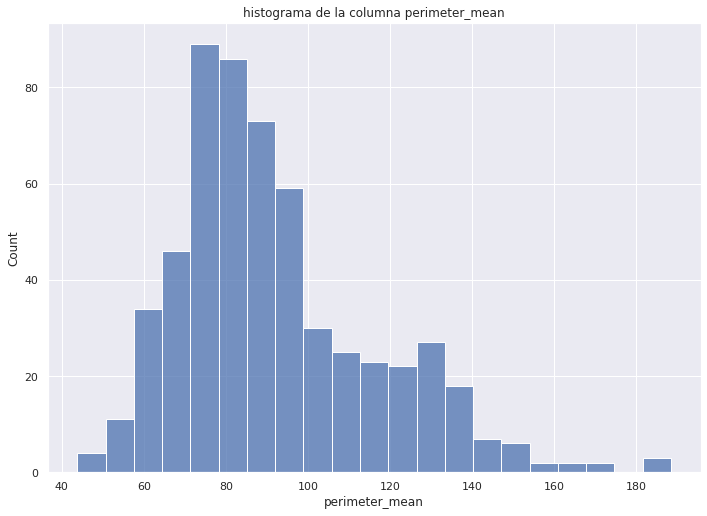

In [ ]:
#distribucion de la columna perimeter_mean
sns.histplot(df.perimeter_mean)
plt.title("histograma de la columna perimeter_mean")
plt.show()

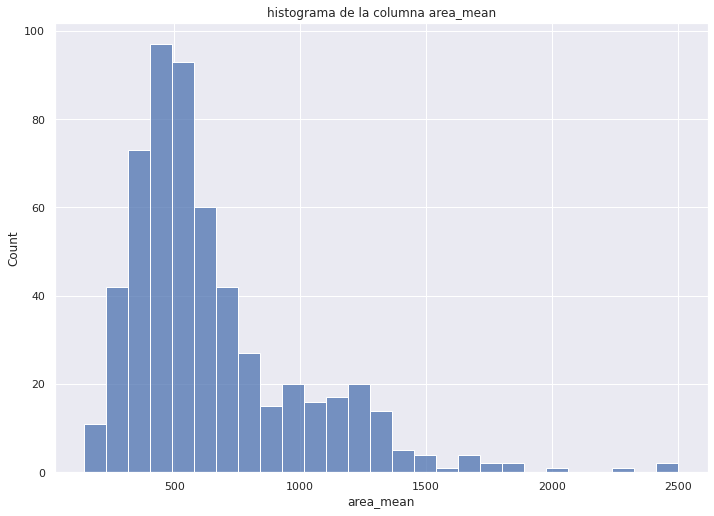

In [ ]:
#distribucion de la columna area_mean
sns.histplot(df.area_mean)
plt.title("histograma de la columna area_mean")
plt.show()

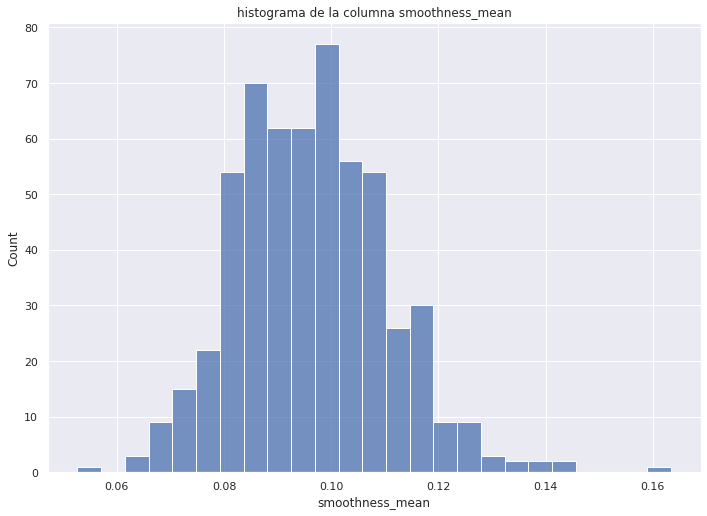

In [ ]:
#distribucion de la columna smoothness_mean
sns.histplot(df.smoothness_mean)
plt.title("histograma de la columna smoothness_mean")
plt.show()

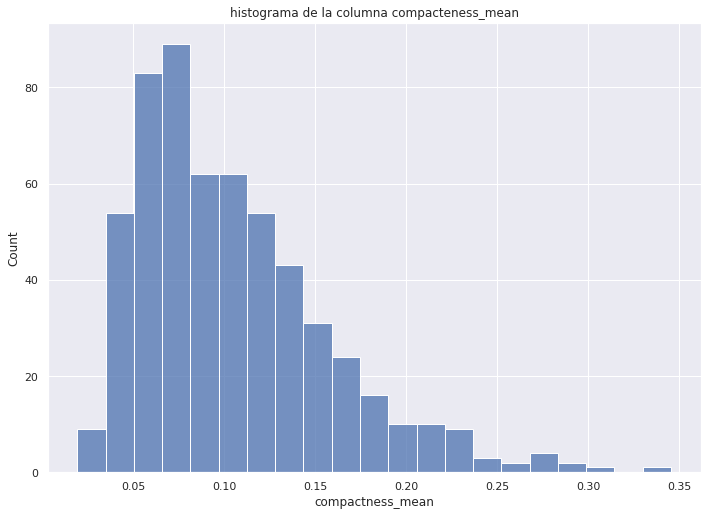

In [ ]:
#distribucion de la columna compactness_mean
sns.histplot(df.compactness_mean)
plt.title("histograma de la columna compacteness_mean")
plt.show()

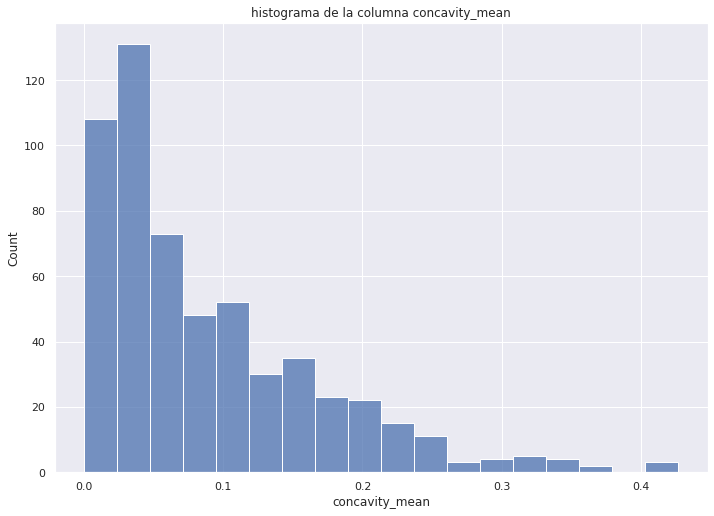

In [ ]:
#distribucion de la columna concavity_mean
sns.histplot(df.concavity_mean)
plt.title("histograma de la columna concavity_mean")
plt.show()

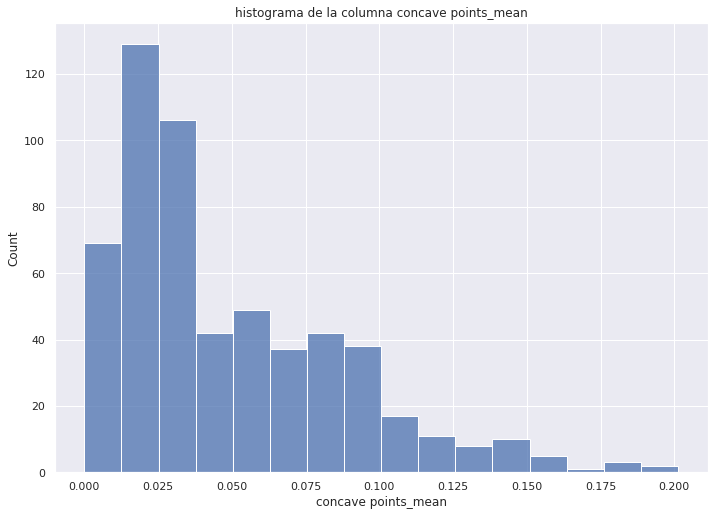

In [ ]:
#distribucion de la columna concave points_mean
sns.histplot(df['concave points_mean'])
plt.title("histograma de la columna concave points_mean")
plt.show()

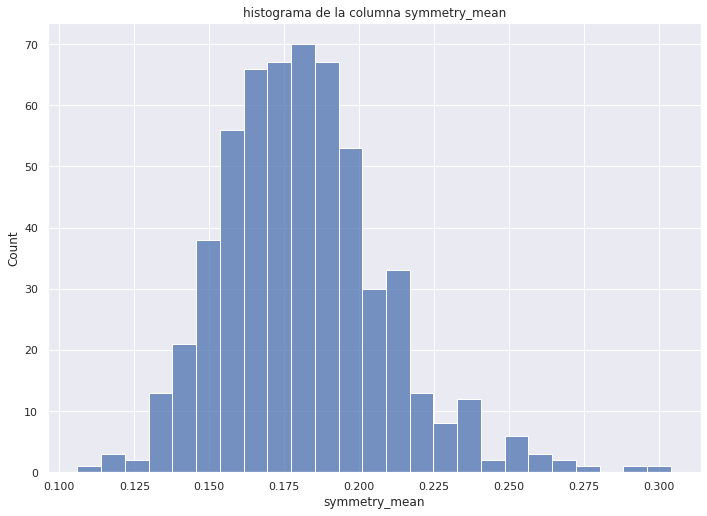

In [ ]:
#distribucion de la columna symmetry_mean
sns.histplot(df.symmetry_mean)
plt.title("histograma de la columna symmetry_mean")
plt.show()

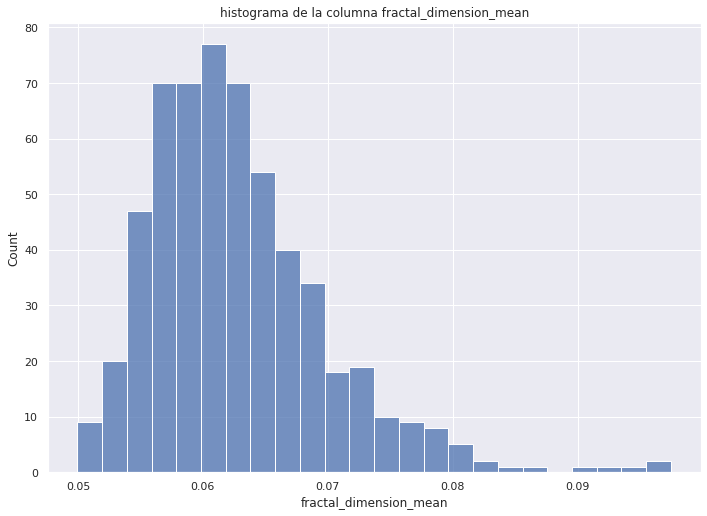

In [ ]:
#distribucion de la columna fractal_dimension_mean
sns.histplot(df.fractal_dimension_mean)
plt.title("histograma de la columna fractal_dimension_mean")
plt.show()

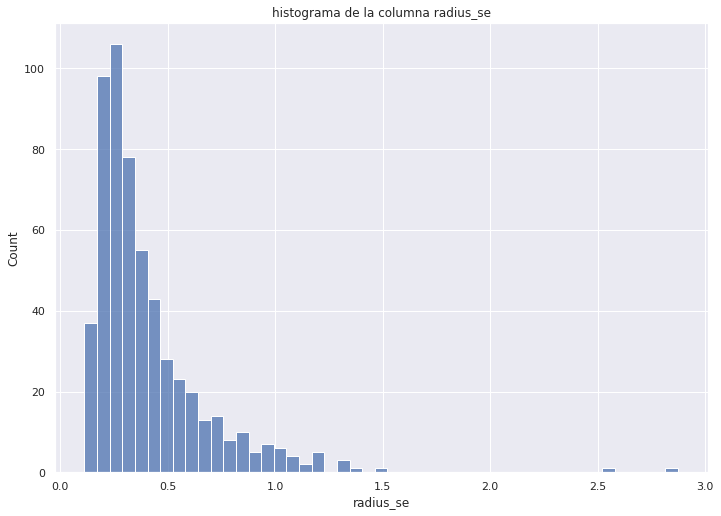

In [ ]:
#distribucion de la columna radius_se
sns.histplot(df.radius_se)
plt.title("histograma de la columna radius_se")
plt.show()

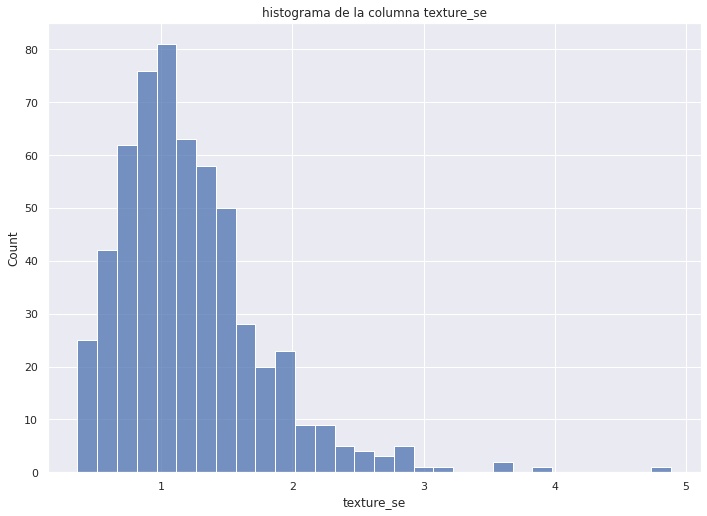

In [ ]:
#distribucion de la columna texture_se
sns.histplot(df.texture_se)
plt.title("histograma de la columna texture_se")
plt.show()

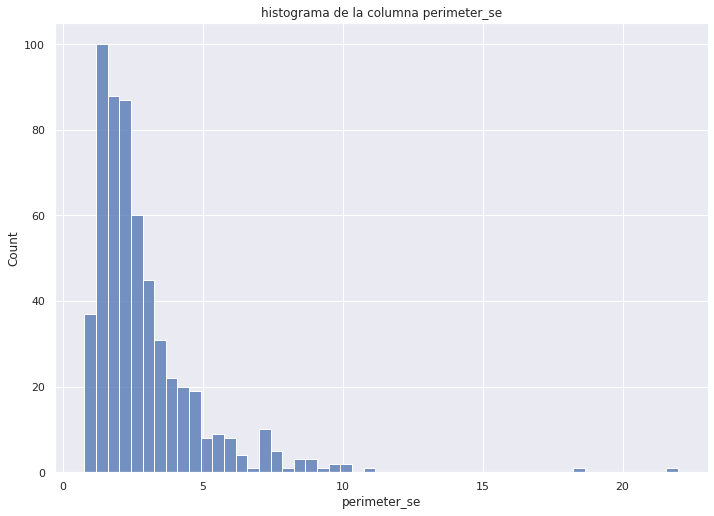

In [ ]:
#distribucion de la columna perimeter_se
sns.histplot(df.perimeter_se)
plt.title("histograma de la columna perimeter_se")
plt.show()

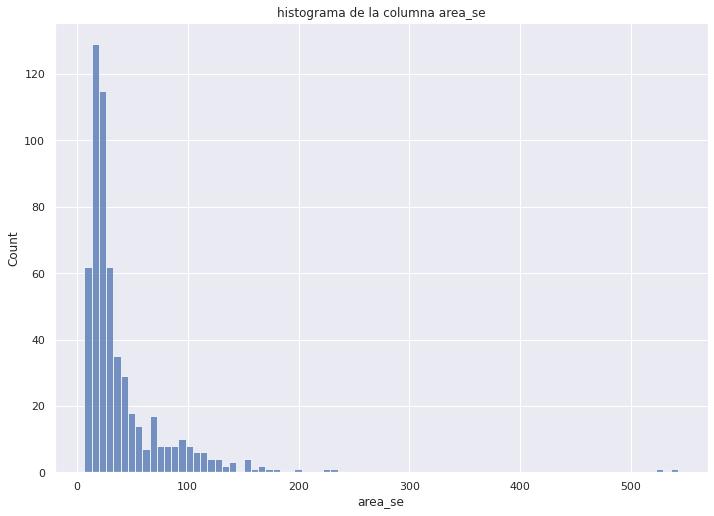

In [ ]:
#distribucion de la columna area_se
sns.histplot(df.area_se)
plt.title("histograma de la columna area_se")
plt.show()

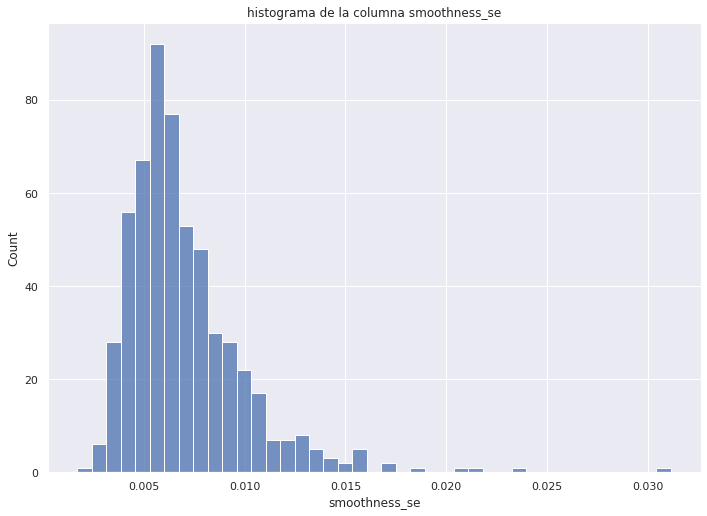

In [ ]:
#distribucion de la columna smoothness_se
sns.histplot(df.smoothness_se)
plt.title("histograma de la columna smoothness_se")
plt.show()

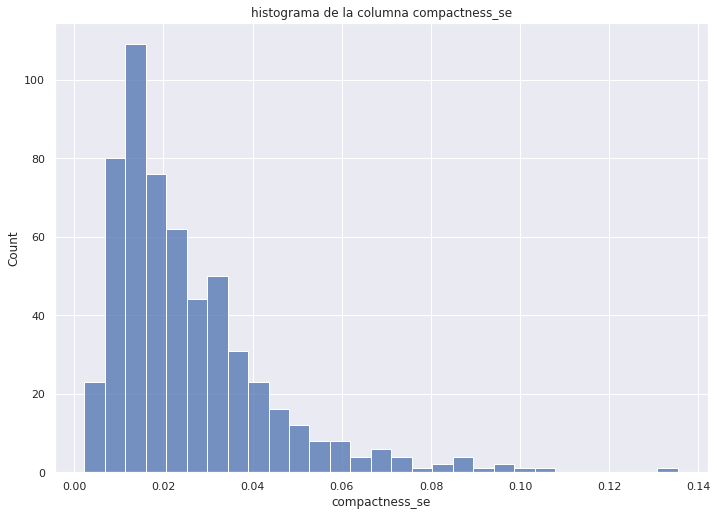

In [ ]:
#distribucion de la columna compactness_se
sns.histplot(df.compactness_se)
plt.title("histograma de la columna compactness_se")
plt.show()

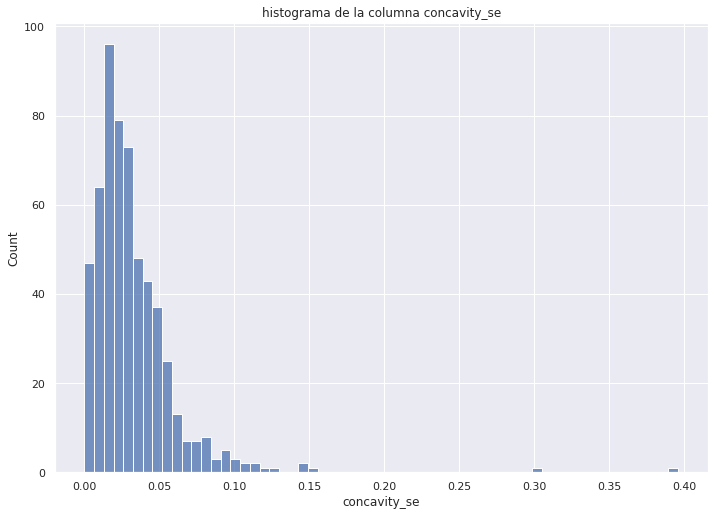

In [ ]:
#distribucion de la columna concavity_se
sns.histplot(df.concavity_se)
plt.title("histograma de la columna concavity_se")
plt.show()

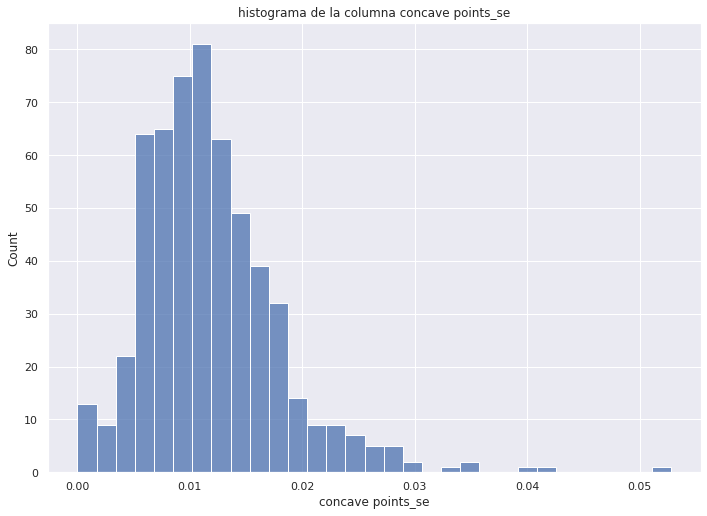

In [ ]:
#distribucion de la columna concave points_se
sns.histplot(df['concave points_se'])
plt.title("histograma de la columna concave points_se")
plt.show()

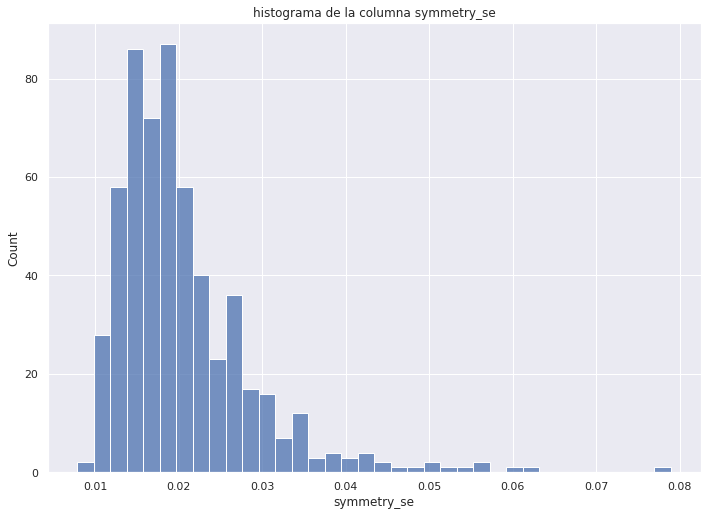

In [ ]:
#distribucion de la columna symmetry_se
sns.histplot(df.symmetry_se)
plt.title("histograma de la columna symmetry_se")
plt.show()

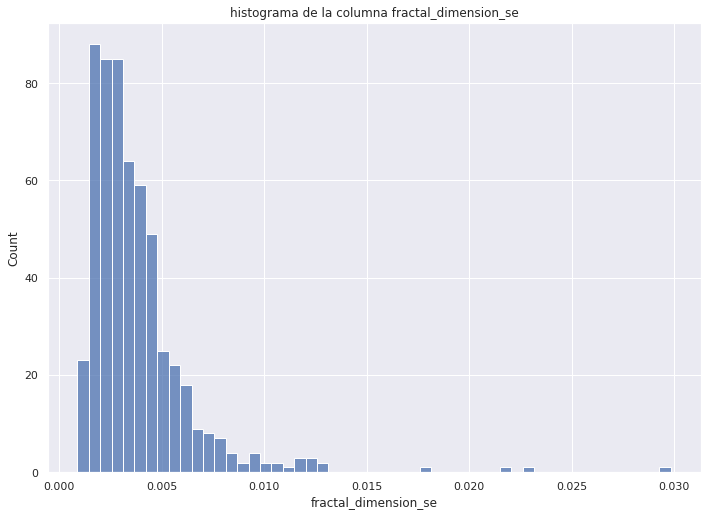

In [ ]:
#distribucion de la columna fractal_dimension_se
sns.histplot(df.fractal_dimension_se)
plt.title("histograma de la columna fractal_dimension_se")
plt.show()

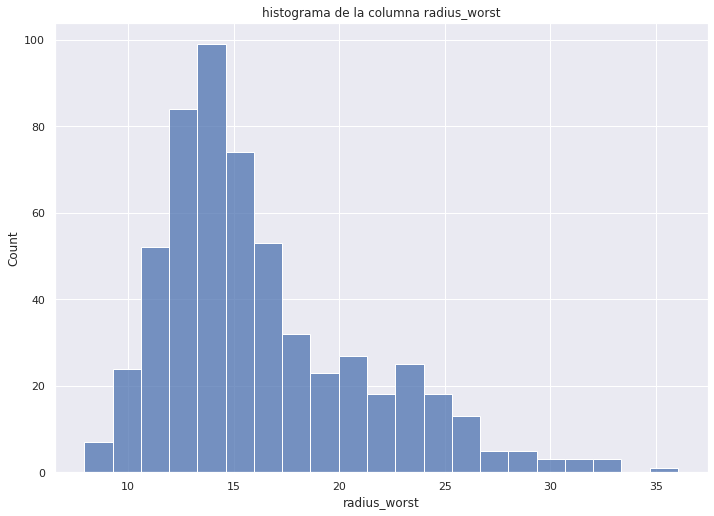

In [ ]:
#distribucion de la columna radius_worst
sns.histplot(df.radius_worst)
plt.title("histograma de la columna radius_worst")
plt.show()

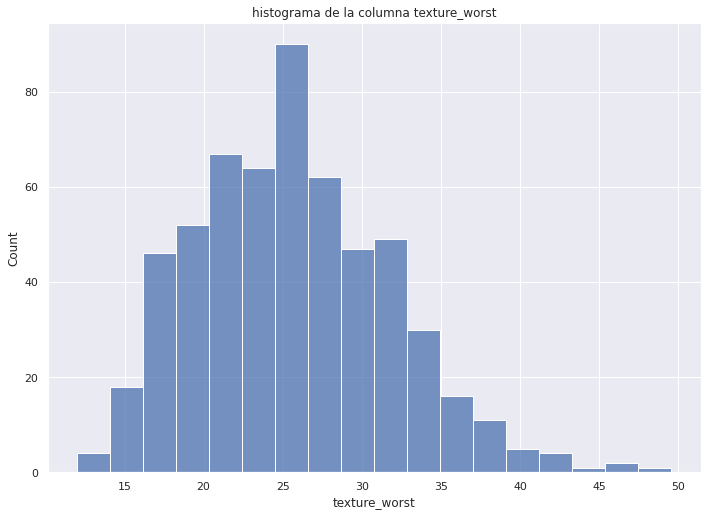

In [ ]:
#distribucion de la columna texture_worst
sns.histplot(df.texture_worst)
plt.title("histograma de la columna texture_worst")
plt.show()

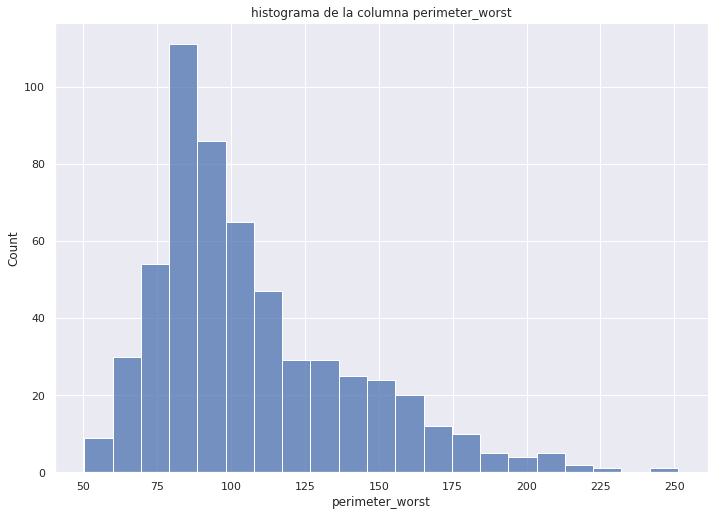

In [ ]:
#distribucion de la columna perimeter_worst
sns.histplot(df.perimeter_worst)
plt.title("histograma de la columna perimeter_worst")
plt.show()

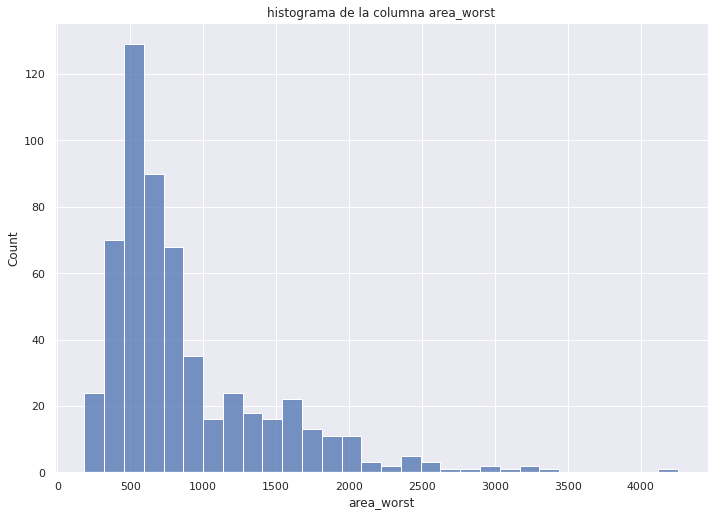

In [ ]:
#distribucion de la columna area_worst
sns.histplot(df.area_worst)
plt.title("histograma de la columna area_worst")
plt.show()

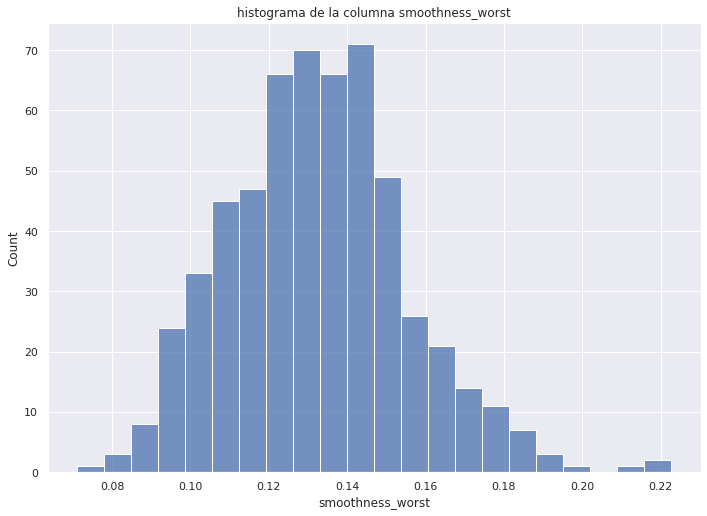

In [ ]:
#distribucion de la columna smoothness_worst
sns.histplot(df.smoothness_worst)
plt.title("histograma de la columna smoothness_worst")
plt.show()

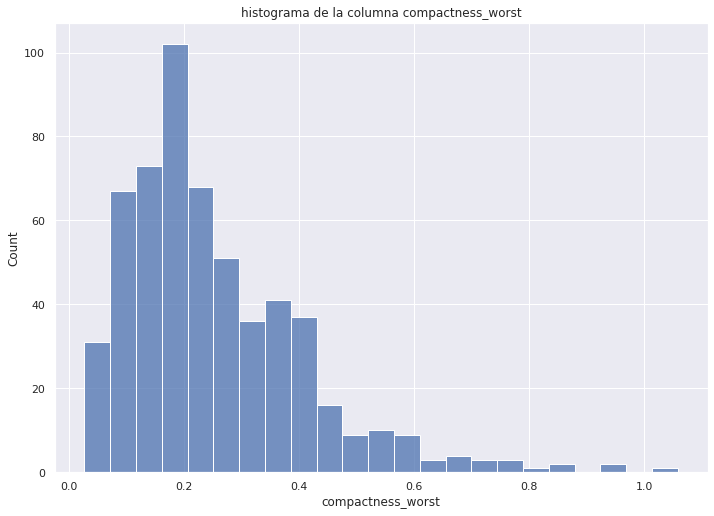

In [ ]:
#distribucion de la columna compactness_worst
sns.histplot(df.compactness_worst)
plt.title("histograma de la columna compactness_worst")
plt.show()

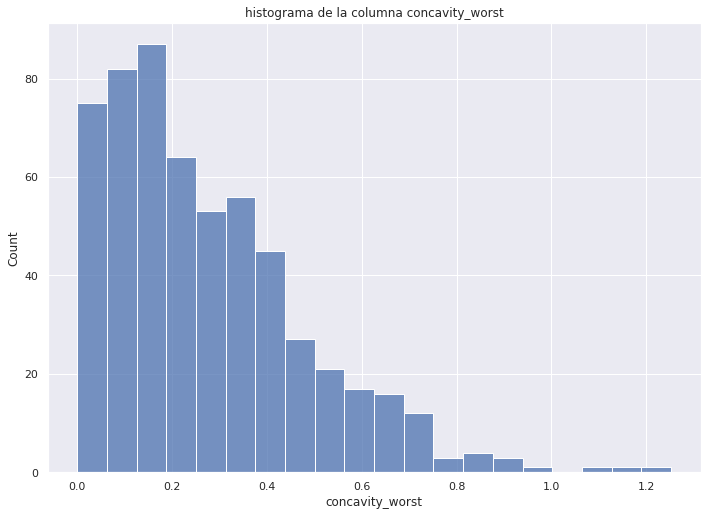

In [ ]:
#distribucion de la columna concavity_worst
sns.histplot(df.concavity_worst)
plt.title("histograma de la columna concavity_worst")
plt.show()

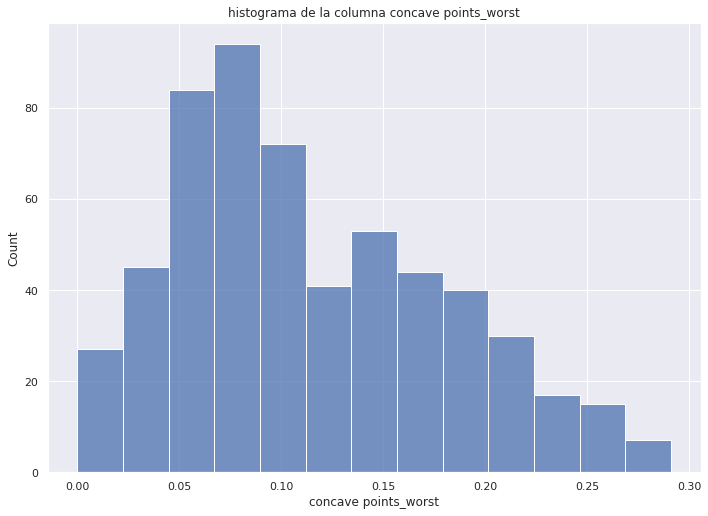

In [ ]:
#distribucion de la columna concave points_worst
sns.histplot(df['concave points_worst'])
plt.title("histograma de la columna concave points_worst")
plt.show()

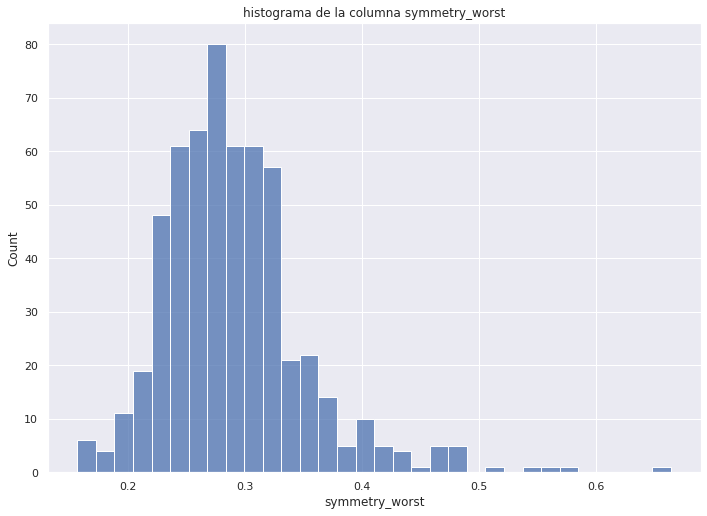

In [ ]:
#distribucion de la columna symmetry_worst
sns.histplot(df.symmetry_worst)
plt.title("histograma de la columna symmetry_worst")
plt.show()

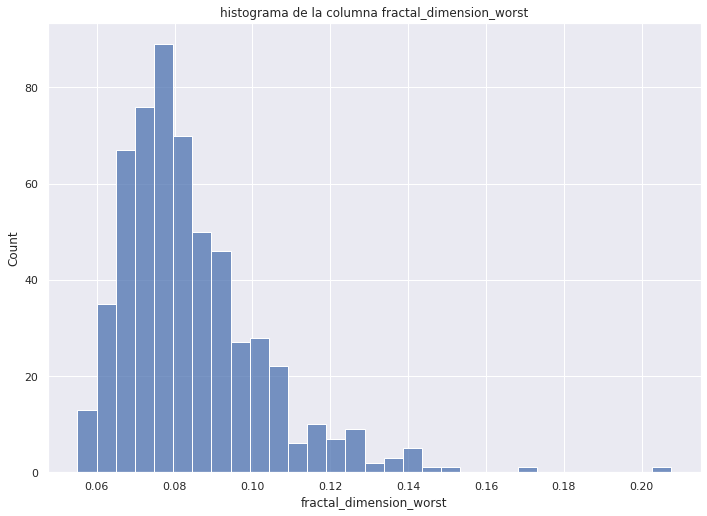

In [ ]:
#distribucion de la columna fractal_dimension_worst
sns.histplot(df.fractal_dimension_worst)
plt.title("histograma de la columna fractal_dimension_worst")
plt.show()

Gracias al grafico de barras de diagnosis, se logra ver que los datos de este dataframe son desbalanceados y hay pocos datos de diagnoticos con pacientes con cancer. Tambien, gracias a los histogramas se ve que la mayoria de los datos tiene una distribucion parecida a la normal y la mayoria de los histogramas tienen un sesgo positivo.

2. Normalizar las variables numéricas con el método StandardScaler
3. Realizar un método de reducción de dimensionalidad visto en clases.

In [ ]:
from sklearn.pipeline import make_pipeline

new_df=df.copy
new_df= df.drop(['id', 'diagnosis'], axis=1)
columnas=new_df.columns
scaler= StandardScaler()
new_df= scaler.fit_transform(new_df)
new_df= pd.DataFrame(new_df, columns= columnas)
new_df


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
info=df.drop(['id', 'diagnosis'], axis=1)
pca_pipe.fit(info)

modelo_pca = pca_pipe.named_steps['pca']
df_pca= pd.DataFrame(data= modelo_pca.components_, columns = info.columns)
df_pca

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
5,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
6,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
7,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
8,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
9,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


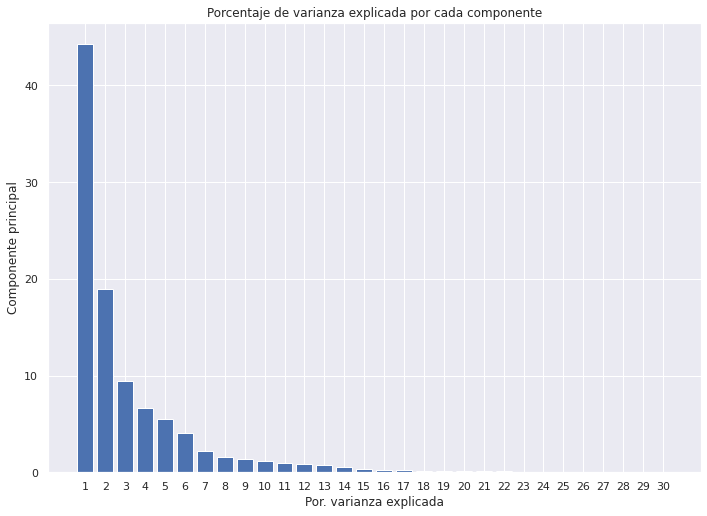

In [ ]:
#grafico de barra para visualizar el porcentaje de varianza explicado por cada componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)

plt.bar(x= range(1,31), height=percent_variance)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

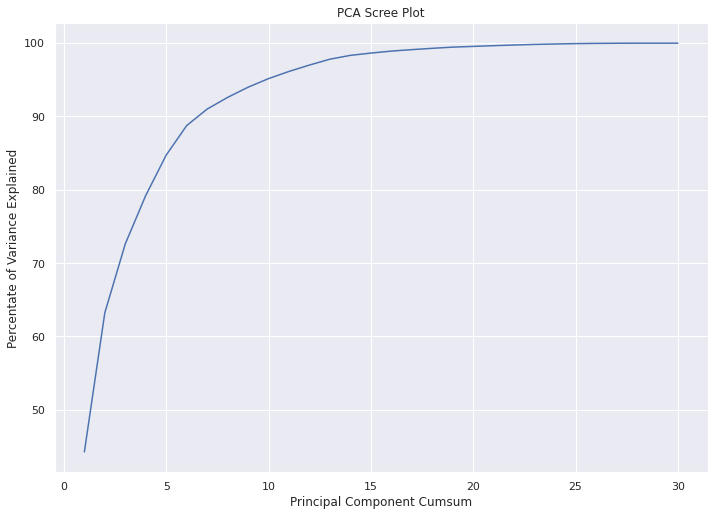

In [ ]:
#grafico de linea para determinar el numero de componentes a usar en el PCA
percent_variance_cum = np.cumsum(percent_variance)

plt.plot(range(1,31), percent_variance_cum)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

A partir del grafico anterior se logra ver que el numero de componenetes al usar PCA debe ser entre 2 y 7, pues en este intervalo la varianza explicada deja de ser una recta. Ademas, usando 7 parametros en el PCA, se explica mas del 90% de la varianza, por lo tanto, usaremos 7 componenetes.

In [ ]:
pca=PCA(n_components=7)
x= new_df
y= df.diagnosis
new_x= pca.fit_transform(x)
new_x= pd.DataFrame(new_x, index=df.id)
new_x.head()

,0,1,2,3,4,5,6
id,,,,,,,
842302,9.192837,1.948583,-1.123166,3.633732,-1.195112,1.411439,2.159414
842517,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657,0.013359
84300903,5.733896,-1.075174,-0.551748,0.912082,-0.177085,0.541440,-0.668205
84348301,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911
84358402,3.935302,-1.948072,1.389767,2.940639,0.546748,-1.226498,-0.936223


4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [ ]:
def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)


# b) Percentage errors

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)


def maape(targets, predictions) -> float:
    """
    Calculo de la metrica:  mean arctangent percentage error  (MAAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """

    error = predictions - targets

    if any((x, y) == (0, 0) for x, y in zip(predictions, targets)):
        return np.inf

    else:
        return round(np.arctan(np.abs(error / targets)).mean(),4)


def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)


def mmape(targets, predictions) -> float:
    """
    Calculo de la metrica: modified mean absolute percentage error (MMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = np.abs(predictions - targets)
    denom = 1 + np.abs(targets)

    return round(np.mean(error / denom),4)


def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['mse'] = [round(mse(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]

    df_result['mape'] = [round(mape(y_true, y_pred), 4)]
    df_result['maape'] = [round(maape(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['mmape'] = [round(mmape(y_true, y_pred), 4)]
    df_result['smape'] = [round(smape(y_true, y_pred), 4)]

    # nombre del modelo por defecto
    #try:
    #    model = df['model'][0]
    #    df_result['model'] = [model]
    #except:
    #    df_result['model'] = ['---']

    return df_result

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


def summary_metrics2(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state = 39)
log= LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print("Puntaje de entrenamiento del regresor logistico:")
print(log.score(x_train, y_train))
df_log= pd.DataFrame({'y': y_test, 'yhat': log.predict(x_test)})
df_metrics_log=summary_metrics(df_log)
df_metrics2_log=summary_metrics2(df_log)
print("\n Errores del regresor logistico:")
print(df_metrics_log)
print("\n Metricas de clasificacion del regresor logistico:")
print(df_metrics2_log)

Puntaje de entrenamiento del regresor logistico:
0.978021978021978

 Errores del regresor logistico:
      mae     mse    rmse  mape  maape   wmape   mmape  smape
0  0.0263  0.0263  0.1622   inf    inf  0.0714  0.0175    inf

 Metricas de clasificacion del regresor logistico:
   accuracy  recall  precision  fscore
0    0.9737  0.9692     0.9741  0.9716


In [ ]:
#@title Texto de título predeterminado
svc= SVC()
svc.fit(x_train, y_train)
print("Puntaje de entrenamiento del svc:")
print(svc.score(x_train, y_train))
df_svc= pd.DataFrame({'y': y_test, 'yhat': svc.predict(x_test)})
df_metrics_svc=summary_metrics(df_svc)
df_metrics2_svc=summary_metrics2(df_svc)
print("\n Metricas del svc:")
print(df_metrics_svc)
print("\n Metricas de clasificacion del svc:")
print(df_metrics2_svc)

Puntaje de entrenamiento del svc:
0.978021978021978

 Metricas del svc:
      mae     mse    rmse  mape  maape   wmape   mmape  smape
0  0.0263  0.0263  0.1622   inf    inf  0.0714  0.0219    inf

 Metricas de clasificacion del svc:
   accuracy  recall  precision  fscore
0    0.9737  0.9742     0.9697  0.9719


In [ ]:
tree= DecisionTreeClassifier(random_state=96)
tree.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 96,
 'splitter': 'best'}

In [ ]:
param_tree= {"criterion": ['gini', 'entropy'], 
             "max_depth": [3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 70, 90, 100]}
grilla_tree= GridSearchCV(tree, param_tree, scoring='accuracy', cv=5, n_jobs=-1)
grilla_tree= grilla_tree.fit(x_train, y_train)

In [ ]:
#ver los resultados d grilla_tree
print(grilla_tree.best_score_)
print(grilla_tree.best_params_)

0.9406593406593406
{'criterion': 'entropy', 'max_depth': 6}


In [ ]:
#utilizar el mejor modelo
mejor_modelo= grilla_tree.best_estimator_
mejor_modelo.fit(x_train, y_train)

print("Puntaje de entrenamiento del arbol de decision clasificador:")
print(mejor_modelo.score(x_train, y_train))
df_tree= pd.DataFrame({'y': y_test, 'yhat': mejor_modelo.predict(x_test)})
df_metrics_tree=summary_metrics(df_tree)
df_metrics2_tree=summary_metrics2(df_tree)
print("\n Metricas del arbol de decision clasificador:")
print(df_metrics_tree)
print("\n Metricas de clasificacion del arbol de decision clasificador:")
print(df_metrics2_tree)

Puntaje de entrenamiento del arbol de decision clasificador:
0.9978021978021978

 Metricas del arbol de decision clasificador:
      mae     mse    rmse  mape  maape   wmape   mmape  smape
0  0.0614  0.0614  0.2478   inf    inf  0.1667  0.0526    inf

 Metricas de clasificacion del arbol de decision clasificador:
   accuracy  recall  precision  fscore
0    0.9386  0.9415       0.93  0.9349


Al usar los modelos Regression Logistic, SVC y DecisionTreeClasifier para poder calsificar si un paciente tiene cancer o no, se logra ver que el modelo SVC tiene mayor Accuracy, Recall y Precision que los otros modelos; además, sus metricas mae, mse, rmse y wmape son son las menores de entre estos 3 modelos. Por lo tanto, se puede concluir que el modelo SVC seria el mejor de estos 3 modelos para cumplir la tarea de identificar si un paciente tiene cancer o no.